In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Flatten
from keras.layers import Dense

In [41]:
fashin_mnist = keras.datasets.fashion_mnist

In [42]:
(train_images, train_labels), (test_images, test_labels) = fashin_mnist.load_data()

In [43]:
class_names = [ "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "bag", "Ankle boot" ]

In [44]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [45]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [46]:
train_images.shape

(60000, 28, 28)

In [47]:
len(train_labels)

60000

In [48]:
test_images.shape

(10000, 28, 28)

In [49]:
len(test_labels)

10000

In [50]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

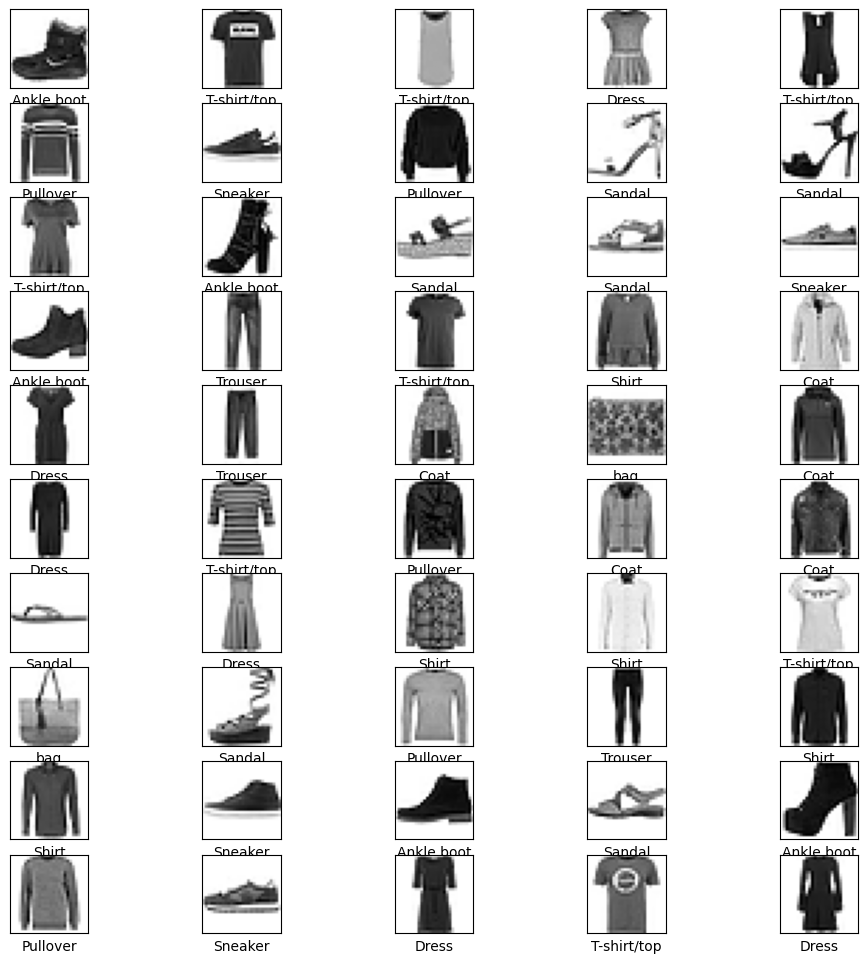

In [51]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]]);

In [52]:
model = Sequential()

In [54]:
model.add( Flatten(input_shape=(28,28)) )
model.add( Dense( 10, activation='sigmoid' ) )
model.add( Dense( 10, activation='softmax' ) )

In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [59]:
model.fit( train_images, train_labels, epochs=5 )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 721us/step - accuracy: 0.3490 - loss: 1.9792
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.6446 - loss: 1.2791
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.6931 - loss: 1.0187
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.7253 - loss: 0.8813
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.7544 - loss: 0.7922


In [60]:
test_loss, test_acc = model.evaluate( test_images, test_labels  )
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.7593 - loss: 0.7626


0.757099986076355

In [61]:
predictions = model.predict( test_images )

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step


In [62]:
predictions[5]

array([8.6710416e-03, 8.8594681e-01, 6.3442900e-03, 2.9553490e-02,
       4.0743686e-02, 5.2409079e-03, 1.1699662e-02, 6.8183611e-03,
       4.3832730e-03, 5.9836404e-04], dtype=float32)

In [63]:
np.argmax(predictions[5])

np.int64(1)

In [64]:
test_labels[5]

np.uint8(1)

In [66]:
def plot_image( i, predictions_array, true_label, img ):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax( predictions_array )

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel( "{} {:2.0f}% ({})".format( class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label] ), color=color )


In [71]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar( range(10), predictions_array, color='#007700' )
    plt.ylim( [0,1] )
    predicted_label = np.argmax( predictions_array )

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('black');

In [72]:
def show_image_predicted(i):
    plt.figure( figsize=(6,3) )
    plt.subplot( 1,2,1 )
    plot_image( i, predictions[i], test_labels, test_images  )
    plt.subplot(1,2,2)
    plot_value_array( i, predictions[i], test_labels )
    


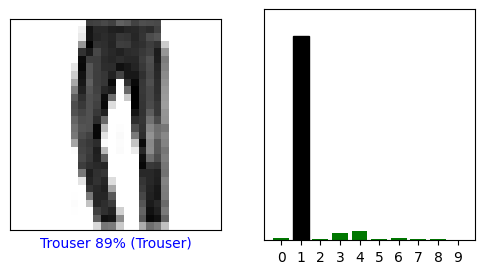

In [73]:
show_image_predicted(5)

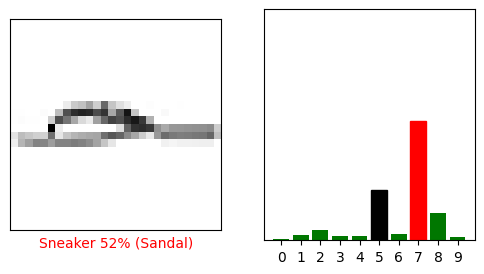

In [74]:
show_image_predicted(8)

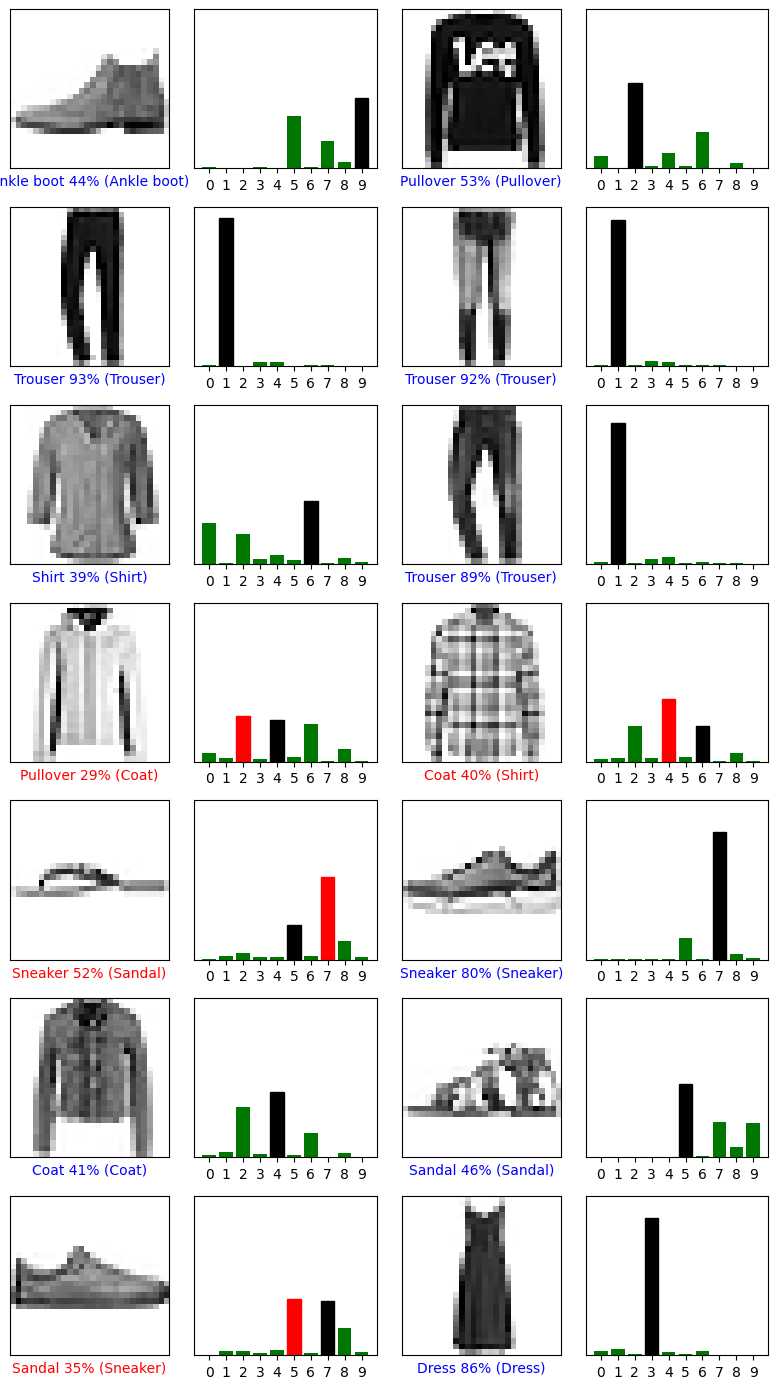

In [75]:
num_rows= 7
num_cols = 2
num_images = num_rows * num_cols
plt.figure( figsize=( 2*2*num_cols, 2* num_rows) )

for i in range(num_images):
    plt.subplot( num_rows, 2*num_cols, 2*i+1 )
    plot_image( i, predictions[i], test_labels, test_images  )
    plt.subplot( num_rows, 2*num_cols, 2*i+2 )
    plot_value_array( i, predictions[i], test_labels )
plt.tight_layout();


In [76]:
model = Sequential()

In [77]:
model.add( Flatten(input_shape=(28,28)) )
model.add( Dense( 10, activation='sigmoid' ) )
model.add( Dense( 10, activation='softmax' ) )

C:\Users\jesus\anaconda3\envs\curso_IA\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [78]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [80]:
model.fit( train_images, train_labels, epochs=5 )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 660us/step - accuracy: 0.6197 - loss: 1.4199
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.8205 - loss: 0.6069
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.8385 - loss: 0.4916
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.8468 - loss: 0.4470
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - accuracy: 0.8534 - loss: 0.4216


In [81]:
test_loss, test_acc = model.evaluate( test_images, test_labels  )
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.8485 - loss: 0.4400


0.8436999917030334

In [82]:
predictions = model.predict( test_images )

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step


In [83]:
predictions[5]

array([3.1915242e-03, 9.8864627e-01, 7.6273008e-04, 3.3228497e-03,
       2.6347688e-03, 3.9902534e-07, 8.6851639e-04, 8.8964234e-06,
       4.2245560e-05, 5.2189740e-04], dtype=float32)

In [84]:
np.argmax(predictions[5])

np.int64(1)

In [85]:
test_labels[5]

np.uint8(1)

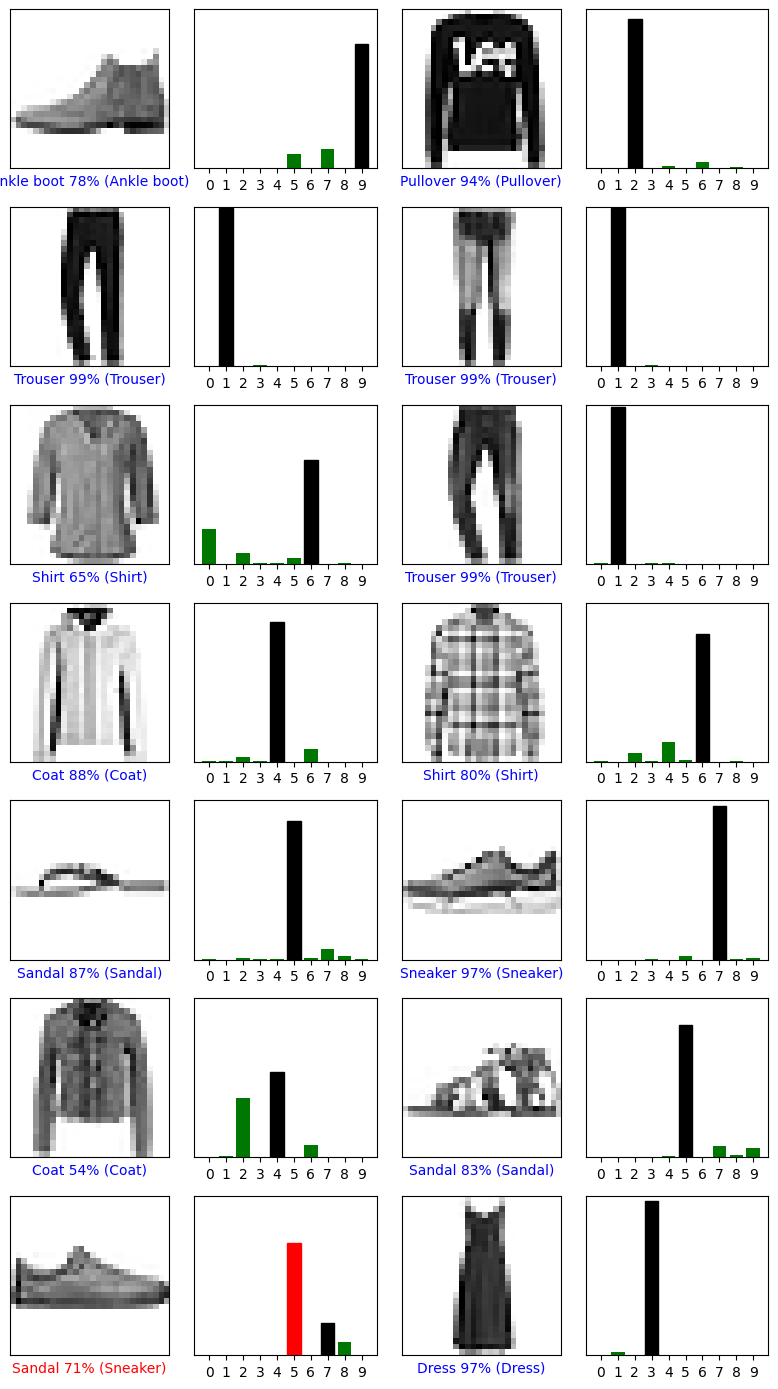

In [86]:
num_rows= 7
num_cols = 2
num_images = num_rows * num_cols
plt.figure( figsize=( 2*2*num_cols, 2* num_rows) )

for i in range(num_images):
    plt.subplot( num_rows, 2*num_cols, 2*i+1 )
    plot_image( i, predictions[i], test_labels, test_images  )
    plt.subplot( num_rows, 2*num_cols, 2*i+2 )
    plot_value_array( i, predictions[i], test_labels )
plt.tight_layout();
